<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

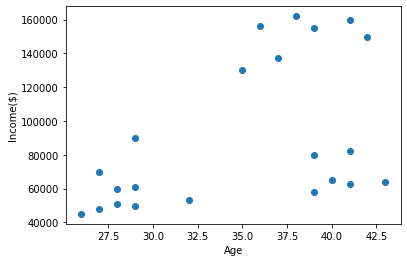

In [4]:
# You can pretty much see 3 clusters so we can use k=3
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [7]:
# You can see 3 clusters being shown in the output such as 0,1,2
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [8]:
# create a new column called 'cluster'
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [25]:
# Centroids of 3 clusters
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

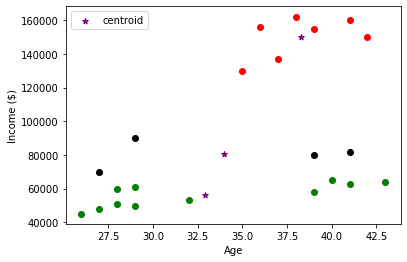

In [12]:
# Seperate these 3 different clusters into 3 different data frames 
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
# Plot these 3 data frames using scatter plots
# Use different colors for each cluster
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [13]:
# RED cluster looks fine but there are some issues with BLUE and GREEN clusters as they are not grouped correctly.
# This is because our scaling is not correct
# Y-Axis has been scaled correctly from 40000 to 160000.. 160000-40000 = 1200000
# But X-axis has been scakled narrowly from 27.5 to 42.5 with just 42.5 - 27.5 = 15 points
# So we have to do scaling of our features in preprocessing using min max scalar 

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [16]:
# minmax scaler will make the scale from 0 to 1 
# Scale Age & Income features
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [17]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


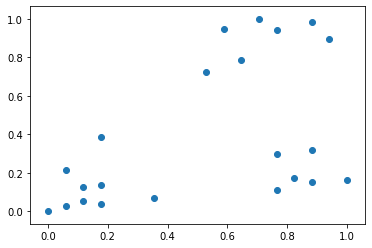

In [18]:
plt.scatter(df.Age,df['Income($)'])

In [19]:
# Train again using scaled data
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [20]:
# Create a new column called Cluster
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [24]:
# Centroids of 3 clusters
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

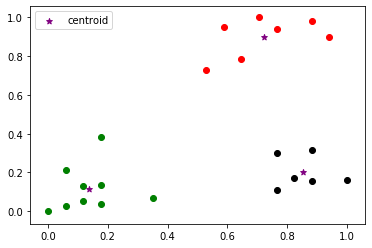

In [22]:
# Seperate these 3 different clusters into 3 different data frames 
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
# Plot these 3 data frames using scatter plots
# Use different colors for each cluster
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [26]:
# Now all 3 clusters are looking fine as the data points are seperated correctly.

<h4 style='color:purple'>Elbow Plot</h4>

Use elbow plot to find the best K

In [28]:
sse = [] # Array for SSE
k_rng = range(1,10) # Range of values of K 
for k in k_rng:
    # For each iteration create a new model with n_clusters = k 
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    # km.inertia_ will give SSE which can be appended to SSE array that we have created
    sse.append(km.inertia_)

In [30]:
# SSE was high initially and then it decreased
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.2664030124668415,
 0.22020960864009392,
 0.1729962193245546,
 0.14072448985352304,
 0.10663983840905435]

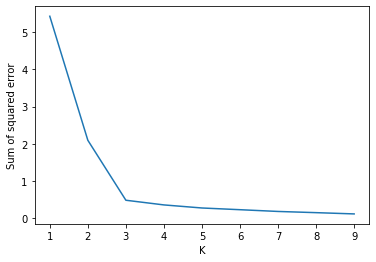

In [31]:
# best value of k=3 as it is an elbow and we have already verfied that k=3 was working fine for us as in the above code
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

<h4 style='color:purple'>Exercise</h4>

<img src='iris.png' width=200 height=200>

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k